# Regresión no Paramétrica

En regresión lineal teníamos el supuesto de que el modelo era lineal en término de sus parámetros.

$f(\boldsymbol{x} | \boldsymbol{\theta}) = \sum_{p = 1}^{k} \theta_pg_p (\boldsymbol{x})$

En regresión no paramétrica se relaja el supuesto de linealidad, por lo que la "forma" del modelo se construye a través de los datos.

$y = g(x) + \epsilon$ 


In [ ]:
import sys
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Notas_1er_anho.csv', sep=',')
display( data.head() )
print(data.dtypes)

,Matemática,Lenguaje,Ciencias,NEM,Colegio_Egreso,Sexo,Nota,asi_Cod
0,626,607,578,660,Subvencionado,F,1.0,530024
1,705,651,638,641,Subvencionado,M,4.7,510145
2,590,581,451,641,Municipalizado,M,2.8,520145
3,700,710,588,721,Subvencionado,F,3.6,520145
4,693,645,575,641,Subvencionado,M,4.0,520145


Matemática          int64
Lenguaje            int64
Ciencias            int64
NEM                 int64
Colegio_Egreso     object
Sexo               object
Nota              float64
asi_Cod             int64
dtype: object


¡Tenemos datos que no son números!

Podemos reemplazarlos con un valor númerico a mano, o de forma automatica ocupando encodings (y un transformer de columnas) o la función "get_dummies" de pandas.

Mostremos que pasa al usar la función get_dummies.

In [ ]:
nuevo_df = pd.get_dummies(data)
nuevo_df.head()

,Matemática,Lenguaje,Ciencias,NEM,Nota,asi_Cod,Colegio_Egreso_Municipalizado,Colegio_Egreso_Privado,Colegio_Egreso_Subvencionado,Sexo_F,Sexo_M
0,626,607,578,660,1.0,530024,0,0,1,1,0
1,705,651,638,641,4.7,510145,0,0,1,0,1
2,590,581,451,641,2.8,520145,1,0,0,0,1
3,700,710,588,721,3.6,520145,0,0,1,1,0
4,693,645,575,641,4.0,520145,0,0,1,0,1


Reemplacemos a mano

In [ ]:
dict_colegio = dict()
dict_sexo = {}
for i in range(len(data.Colegio_Egreso.unique())):
  dict_colegio[data.Colegio_Egreso.unique()[i]] = i+1

for i in range(len(data.Sexo.unique())):
  dict_sexo[data.Sexo.unique()[i]] = i+1

dict_total = {**dict_colegio, **dict_sexo}
dict_total

{'F': 1, 'M': 2, 'Municipalizado': 2, 'Privado': 3, 'Subvencionado': 1}

In [ ]:
data = data.replace(dict_total)
data.head()

,Matemática,Lenguaje,Ciencias,NEM,Colegio_Egreso,Sexo,Nota,asi_Cod
0,626,607,578,660,1,1,1.0,530024
1,705,651,638,641,1,2,4.7,510145
2,590,581,451,641,2,2,2.8,520145
3,700,710,588,721,1,1,3.6,520145
4,693,645,575,641,1,2,4.0,520145


In [ ]:
data.columns

Index(['Matemática', 'Lenguaje', 'Ciencias', 'NEM', 'Colegio_Egreso', 'Sexo',
       'Nota', 'asi_Cod'],
      dtype='object')

In [ ]:
x = data[['Matemática', 'Lenguaje', 'Ciencias', 'NEM', 'Colegio_Egreso', 'Sexo', 'asi_Cod']]
y = data['Nota'] 

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#x = preprocessing.scale(x.values)

#dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    x.values, y.values, test_size=0.3, random_state=10)


### Regresión K-NN

El algoritmo de K vecinos más cercanos (K-NN) es un método no paramétrico utilizado para clasificación y regresión.
* Dado un $\boldsymbol{x} $, calculamos sus $ K $ vecinos más cercanos.
* El valor de $\hat{f} (\boldsymbol{x}) $ se calcula como la media de los valores $ y_k $ de los $ K $ puntos de datos más cercanos.
\begin{equation}
\hat{f}(\boldsymbol{x}) = \frac{1}{K}\sum_{k\in N_K(\boldsymbol{x})}y_k
\end{equation}
* Para calcular a los K vecinos mas cercanos se debe utilizar una métrica de distancia.

*Documentación : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html*

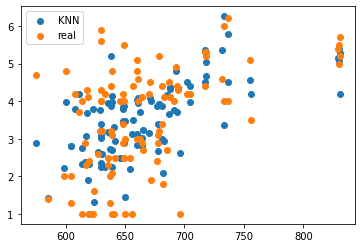

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

knn = KNeighborsRegressor()
knn.fit (X_train, y_train)
y_pred = knn.predict(X_test)

plt.scatter (X_test[:100, 0], y_pred[:100], label = "KNN")
plt.scatter (X_test[:100, 0], y_test[:100], label = "real")
plt.legend()
plt.show()


In [ ]:
print("KNN MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("KNN R2: %.2f" %r2_score(y_test, y_pred))

KNN MSE: 1.14
KNN R2: 0.41


Obtengamos el K utilizando validación cruzada

1. Solo variando el K

In [ ]:
from sklearn.model_selection import GridSearchCV

K_range = np.arange(1, 21)
param_grid = dict(n_neighbors = K_range)
grid = GridSearchCV (KNeighborsRegressor(), cv = 10, 
                     param_grid = param_grid, return_train_score = True)
grid.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

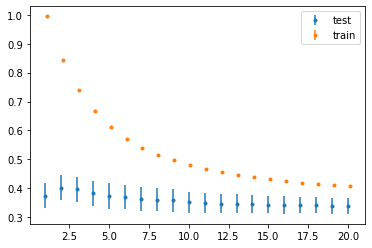

In [ ]:
# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

plt.errorbar (K_range, scores_m_test, yerr = scores_s_test, fmt = '.', label = "test")
plt.errorbar (K_range+0.1, scores_m_train, yerr = scores_s_train, fmt = '.', label = "train")
plt.legend(loc = "best")
plt.show()

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("KNN MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("KNN R2: %.2f" %r2_score(y_test, y_pred))

KNN MSE: 1.06
KNN R2: 0.45


In [ ]:
knn_ = grid.best_estimator_

2. Variando K y "weights"

In [ ]:
K_range = np.arange(1, 21)
pesos = ["uniform", "distance"]
param_grid = dict(n_neighbors = K_range, weights = pesos)
grid = GridSearchCV (KNeighborsRegressor(), cv = 10, 
                     param_grid = param_grid, return_train_score = True)
grid.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

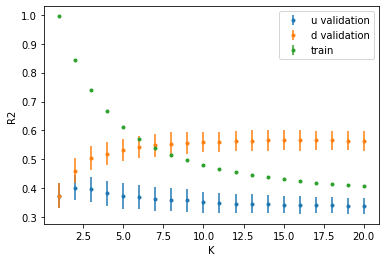

In [ ]:
# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

uniform_scores_m_test = []
distance_scores_m_test = []
uniform_scores_s_test = []
distance_scores_s_test = []
uniform_scores_m_train = []
uniform_scores_s_train = []

for i in range(len(K_range)*2):
  if(i%2 == 0):
    uniform_scores_m_test.append(scores_m_test[i])
    uniform_scores_s_test.append(scores_s_test[i])
    uniform_scores_m_train.append(scores_m_train[i])
    uniform_scores_s_train.append(scores_s_train[i])
  else: 
    distance_scores_m_test.append(scores_m_test[i])
    distance_scores_s_test.append(scores_s_test[i])
    
plt.errorbar (K_range, uniform_scores_m_test, yerr = uniform_scores_s_test, fmt = '.', label = "u validation")
plt.errorbar (K_range, distance_scores_m_test, yerr = distance_scores_s_test, fmt = '.', label = "d validation")
plt.errorbar (K_range, uniform_scores_m_train, yerr = uniform_scores_s_train, fmt = '.', label = "train")
plt.xlabel("K")
plt.ylabel("R2")
plt.legend(loc = "best")
plt.show()

In [ ]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')

In [ ]:
original = mean_squared_error(y_test, knn_.predict(X_test))
nuevo = mean_squared_error(y_test, grid.best_estimator_.predict(X_test))
if(nuevo < original):
  knn_ = grid.best_estimator_

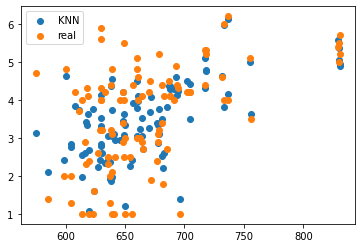

In [ ]:
y_grid = knn_.predict(X_test[0:100])

plt.scatter(X_test[0:100, 0], y_grid, label = "KNN")
plt.scatter(X_test[0:100, 0], y_test[0:100], label = "real")
plt.legend()
plt.show()

### SVM

Las máquinas de vectores de soporte o máquinas de vector soporte (del inglés Support Vector Machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado. 

SVM construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad muy alta (o incluso infinita) que puede ser utilizado en problemas de clasificación o regresión.


*Documentación : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html*

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


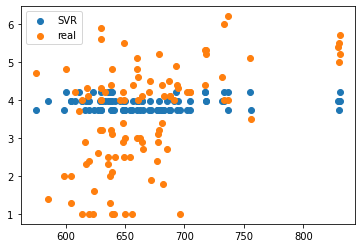

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

svr = SVR()
svr.fit (X_train, y_train)
y_pred = svr.predict(X_test)

linear_svr = LinearSVR()
linear_svr.fit (X_train, y_train)
y_pred_ = linear_svr.predict(X_test)

plt.scatter (X_test[:100, 0], y_pred[:100], label = "SVR")
plt.scatter (X_test[:100, 0], y_test[:100], label = "real")
plt.legend()
plt.show()


In [ ]:
print("SVR MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("SVR R2: %.2f\n" %r2_score(y_test, y_pred))

print("LinearSVR MSE: %.2f" %mean_squared_error(y_test, y_pred_))
print("LinearSVR R2: %.2f" %r2_score(y_test, y_pred_))

SVR MSE: 1.98
SVR R2: -0.04

LinearSVR MSE: 1.91
LinearSVR R2: 0.00


In [ ]:
kernels = ["poly", "rbf", "sigmoid"]
param_grid = dict(kernel = kernels)
grid = GridSearchCV (SVR(), cv = 10, 
                     param_grid = param_grid, return_train_score = True)
grid.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

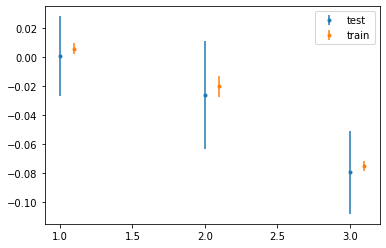

In [ ]:
# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

plt.errorbar (np.arange(1, len(kernels) +1), scores_m_test, yerr = scores_s_test, fmt = '.', label = "test")
plt.errorbar (np.arange(1, len(kernels) +1) +0.1, scores_m_train, yerr = scores_s_train, fmt = '.', label = "train")
plt.legend(loc = "best")
plt.show()

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("SVR MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("SVR R2: %.2f" %r2_score(y_test, y_pred))

SVR MSE: 1.94
SVR R2: -0.02


In [ ]:
svr_ = grid.best_estimator_

In [ ]:
grado = np.arange(1,21)
param_grid = dict(degree = grado)
grid = GridSearchCV (SVR(kernel = "poly"), cv = 10, 
                     param_grid = param_grid, return_train_score = True)
grid.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

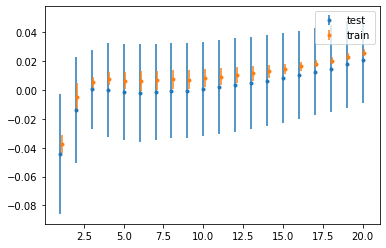

In [ ]:
# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

plt.errorbar (grado, scores_m_test, yerr = scores_s_test, fmt = '.', label = "test")
plt.errorbar (grado+0.1, scores_m_train, yerr = scores_s_train, fmt = '.', label = "train")
plt.legend(loc = "best")
plt.show()

In [ ]:
grid.best_estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=20, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
original = mean_squared_error(y_test, svr_.predict(X_test))
nuevo = mean_squared_error(y_test, grid.best_estimator_.predict(X_test))
if(nuevo < original):
  svr_ = grid.best_estimator_

## Árboles de regresión

Utilizan árboles de decisión.

Un árbol de decisión -> Mapa de los posibles resultados de de cada combinación de alternativas presentes.

Los modelos de árbol, donde la variable de destino puede tomar un conjunto finito de valores se denominan **árboles de clasificación**. Los árboles de decisión, donde la variable de destino puede tomar valores continuos (por lo general números reales) se llaman **árboles de regresión**. *(Fuente: Wikipedia)*

La idea es dividir el espacio de nuestras variables independientes linealmente en distintas regiones.

<img src = "https://github.com/cridonoso/IntroToDataScience/raw/cefcba909f50e435cf1b0293f3e683330436beda/6-Regression/DataScience1_05_NonParametricRegression/images/TreeRegression.png/">



Dado un árbol $T$, la suma de los errores al cuadrado es:
\begin{equation}
S = \sum_{c\in\mathrm{hojas}(T)}\sum_{i\in c} (y_i - m_c)^2.
\end{equation}


Cada nodo se determina dividiendo la coordenada que minimiza el error.

#### Algoritmo básico


* Comenzar con un solo nodo que contenga todos los puntos. Calcular $ m_c $ y $ S $.
* Si todos los puntos del nodo tienen el mismo valor para todas las variables independientes:
  * Detener
* En otro caso (Else):
  * Buscar entre todas las divisiones binarias de todas las variables la que reducirá $ S $ tanto como sea posible.
  * Si la mayor disminución en $S$ es menor que un umbral $\delta$ o uno de los nodos resultantes contienen menos de $q$ puntos:
    * Detener
  * Else:
    * Hacer esa división, creando dos nuevos nodos
  * Para cada nuevo nodo:
      Repetir el procedimiento

## Código

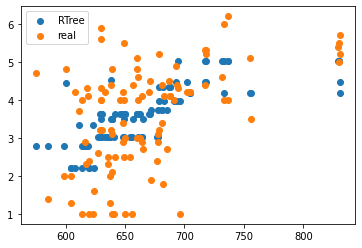

In [ ]:
from sklearn import tree

RTree = tree.DecisionTreeRegressor(max_depth=4)
RTree.fit (X_train, y_train)
y_pred = RTree.predict(X_test)


plt.scatter (X_test[:100, 0], y_pred[:100], label = "RTree")
plt.scatter (X_test[:100, 0], y_test[:100], label = "real")
plt.legend()
plt.show()

Podemos mostrar el árbol utilizando **plot_tree**

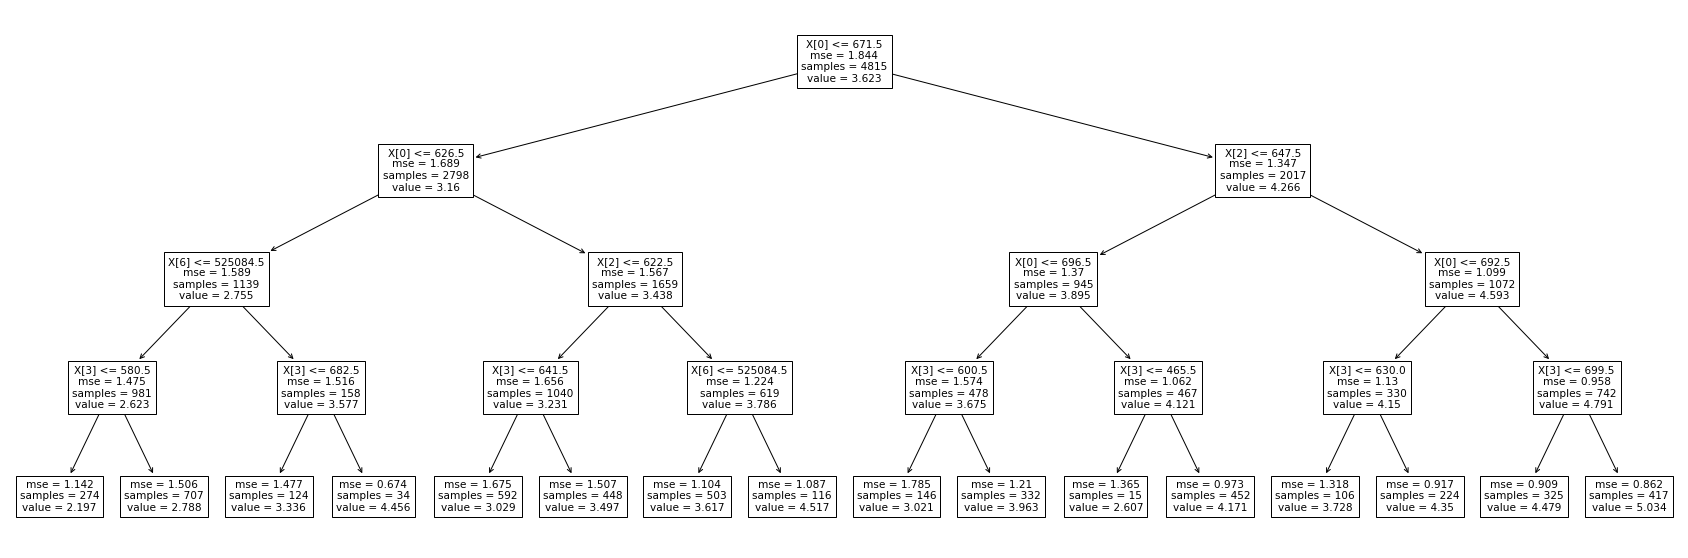

In [ ]:
plt.figure(figsize=(30,10))
tree.plot_tree(RTree);

In [ ]:
print("Regression Tree MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("Regression Tree R2: %.2f\n" %r2_score(y_test, y_pred))

Regression Tree MSE: 1.29
Regression Tree R2: 0.32



In [ ]:
prof = np.arange(1,11)
param_grid = dict(max_depth = prof)
grid = GridSearchCV (tree.DecisionTreeRegressor(), cv = 10, 
                     param_grid = param_grid, return_train_score = True)
grid.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

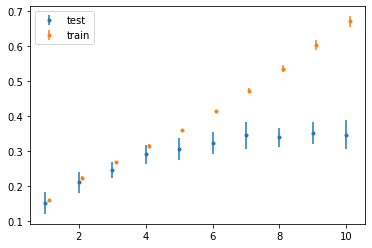

In [ ]:
# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

plt.errorbar (prof, scores_m_test, yerr = scores_s_test, fmt = '.', label = "test")
plt.errorbar (prof+0.1, scores_m_train, yerr = scores_s_train, fmt = '.', label = "train")
plt.legend(loc = "best")
plt.show()

In [ ]:
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Regression Tree MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("Regression Tree R2: %.2f" %r2_score(y_test, y_pred))

Regression Tree MSE: 1.13
Regression Tree R2: 0.41


In [ ]:
RTree_ = grid.best_estimator_

In [ ]:
prof = np.arange(1,11)
criterio = ["friedman_mse", "mae"]
param_grid = dict(criterion = criterio, max_depth = prof)
grid = GridSearchCV (tree.DecisionTreeRegressor(), cv = 10, 
                     param_grid = param_grid, return_train_score = True)
grid.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
   

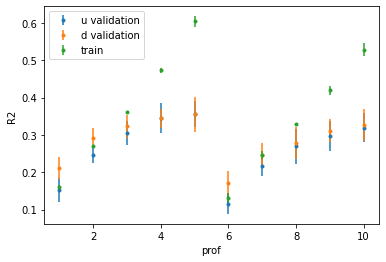

In [ ]:
# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

uniform_scores_m_test = []
distance_scores_m_test = []
uniform_scores_s_test = []
distance_scores_s_test = []

uniform_scores_m_train = []
uniform_scores_s_train = []

for i in range(len(prof)*2):
  if(i%2 == 0):
    uniform_scores_m_test.append(scores_m_test[i])
    uniform_scores_s_test.append(scores_s_test[i])
    uniform_scores_m_train.append(scores_m_train[i])
    uniform_scores_s_train.append(scores_s_train[i])
  else: 
    distance_scores_m_test.append(scores_m_test[i])
    distance_scores_s_test.append(scores_s_test[i])
    
plt.errorbar (prof, uniform_scores_m_test, yerr = uniform_scores_s_test, fmt = '.', label = "u validation")
plt.errorbar (prof, distance_scores_m_test, yerr = distance_scores_s_test, fmt = '.', label = "d validation")
plt.errorbar (prof, uniform_scores_m_train, yerr = uniform_scores_s_train, fmt = '.', label = "train")
plt.xlabel("prof")
plt.ylabel("R2")
plt.legend(loc = "best")
plt.show()

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Regression Tree MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("Regression Tree R2: %.2f" %r2_score(y_test, y_pred))

Regression Tree MSE: 1.12
Regression Tree R2: 0.41


In [ ]:
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
original = mean_squared_error(y_test, RTree_.predict(X_test))
nuevo = mean_squared_error(y_test, grid.best_estimator_.predict(X_test))
if(nuevo < original):
  RTree_ = grid.best_estimator_

## Random Forest Regression

Combina $n$ árboles de regresión:

* $n$ árboles
* para cada árbol:
* * seleccionar una muestra utilizando bootstrap (extraer con reemplazo)
* * entrenar usando $m$ atributos elegidos al azar para dividir cada nodo
* $\hat{f}(x) = \frac{1}{n}\sum \hat{f}_i(x)$

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


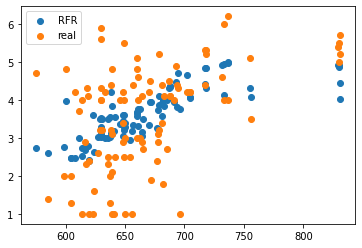

In [ ]:
from sklearn.ensemble.forest import RandomForestRegressor

RFR = RandomForestRegressor(max_depth = 4, n_estimators = 100)
RFR.fit (X_train, y_train)
y_pred = RFR.predict(X_test)


plt.scatter (X_test[:100, 0], y_pred[:100], label = "RFR")
plt.scatter (X_test[:100, 0], y_test[:100], label = "real")
plt.legend()
plt.show()

In [ ]:
print("RFR MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("RFR R2: %.2f\n" %r2_score(y_test, y_pred))

RFR MSE: 1.24
RFR R2: 0.35



In [ ]:
prof = np.arange(1,21)
param_grid = dict(max_depth = prof)
grid = GridSearchCV (RandomForestRegressor(), cv = 10, 
                     param_grid = param_grid, return_train_score = True)
grid.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

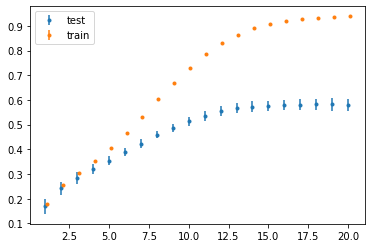

In [ ]:
# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

plt.errorbar (prof, scores_m_test, yerr = scores_s_test, fmt = '.', label = "test")
plt.errorbar (prof+0.1, scores_m_train, yerr = scores_s_train, fmt = '.', label = "train")
plt.legend(loc = "best")
plt.show()

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("RFR MSE: %.2f" %mean_squared_error(y_test, y_pred))
print("RFR Tree R2: %.2f" %r2_score(y_test, y_pred))

RFR MSE: 0.72
RFR Tree R2: 0.63


In [ ]:
RFR_ = grid.best_estimator_ 

# Comparemos los modelos

In [ ]:
MSEs = []
R2s = []
for i in [knn_, svr_, RTree_, RFR_]:
  MSEs.append(mean_squared_error(y_test, i.predict(X_test)))
  R2s.append(r2_score(y_test, i.predict(X_test)))

In [ ]:
tablita = pd.DataFrame({"Modelo": ["KNN", "SVR", "R Tree", "RFR"], "MSE" : MSEs, "R2": R2s})
tablita

,Modelo,MSE,R2
0,KNN,0.770662,0.596755
1,SVR,1.893904,0.009023
2,R Tree,1.124799,0.411454
3,RFR,0.716584,0.625051
